<a href="https://colab.research.google.com/github/atharva2-0x/DataBase_To_Table/blob/main/BIG4updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = np.genfromtxt('tranxData.csv', delimiter=',', dtype=str)

In [ ]:
# Convert dataset to pandas DataFrame
df = pd.DataFrame(data[1:], columns=data[0])

In [ ]:
df


,Date,Day,Time,TransactionID,CustomerID,Item,Category,Amount,PaymentMethod
0,1/1/2024,Monday,9:15,TXN10001,CUST001,Latte,Beverage,5,Credit Card
1,1/1/2024,Monday,9:30,TXN10002,CUST002,Americano,Beverage,4.5,Mobile Payment
2,1/1/2024,Monday,9:45,TXN10003,CUST003,Turkey Sandwich,Food,7,Credit Card
3,1/1/2024,Monday,10:00,TXN10004,CUST004,Blueberry Muffin,Pastry,3,Cash
4,1/1/2024,Monday,12:15,TXN10005,CUST005,Espresso,Beverage,3,Credit Card
...,...,...,...,...,...,...,...,...,...
247,1/7/2024,Sunday,15:00,TXN10257,CUST032,Blueberry Muffin,Pastry,3,Credit Card
248,1/7/2024,Sunday,15:10,TXN10258,CUST033,Iced Tea,Beverage,3.5,Mobile Payment
249,1/7/2024,Sunday,19:20,TXN10269,CUST008,Latte,Beverage,5,Mobile Payment
250,1/7/2024,Sunday,15:30,TXN10260,CUST035,Latte,Beverage,5,Cash


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           252 non-null    object
 1   Day            252 non-null    object
 2   Time           252 non-null    object
 3   TransactionID  252 non-null    object
 4   CustomerID     252 non-null    object
 5   Item           252 non-null    object
 6   Category       252 non-null    object
 7   Amount         252 non-null    object
 8   PaymentMethod  252 non-null    object
dtypes: object(9)
memory usage: 17.8+ KB


In [ ]:
#checking the null values of the data set
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
247,False
248,False
249,False
250,False


In [ ]:
# Convert Time column to datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')

# Define time slots
time_slots = ["9am-1pm", "1pm-5pm", "5pm-9pm"]

In [ ]:
# Initialize dictionary to hold transaction counts for each day and time slot
transaction_counts = {day: [0, 0, 0] for day in df['Day'].unique()}


In [ ]:

# Calculate number of transactions within each time slot for each day
for day in df['Day'].unique():
    df_day = df[df['Day'] == day]
    for i, time_slot in enumerate(time_slots):
        start_time = pd.to_datetime(time_slot.split('-')[0], format='%I%p').time()
        end_time = pd.to_datetime(time_slot.split('-')[1], format='%I%p').time()
        transaction_counts[day][i] = df_day.loc[(df_day['Time'].dt.time >= start_time) & (df_day['Time'].dt.time < end_time)].shape[0]


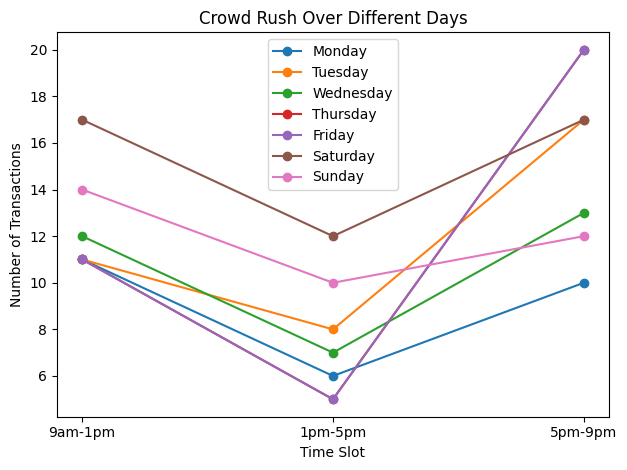

In [ ]:

# Plot the line graph for each day
for day in transaction_counts.keys():
    plt.plot(time_slots, transaction_counts[day], marker='o', label=day)

plt.xlabel('Time Slot')
plt.ylabel('Number of Transactions')
plt.title('Crowd Rush Over Different Days')
plt.legend()
plt.tight_layout()

# Display the graph
plt.show()


In [ ]:
df['TypeOfDay'] = df['Day'].apply(lambda x: 'Weekday' if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'Weekend')


# Define time slots
time_slots = ["9am-1pm", "1pm-5pm", "5pm-9pm"]

# Initialize dictionaries to hold transaction counts for weekdays and weekends
transaction_counts_weekday = {slot: 0 for slot in time_slots}
transaction_counts_weekend = {slot: 0 for slot in time_slots}

# Calculate number of transactions within each time slot for weekdays and weekends
weekday_count = df[df['TypeOfDay'] == 'Weekday']['Day'].nunique()
weekend_count = df[df['TypeOfDay'] == 'Weekend']['Day'].nunique()

In [ ]:
for time_slot in time_slots:
    start_time = pd.to_datetime(time_slot.split('-')[0], format='%I%p').time()
    end_time = pd.to_datetime(time_slot.split('-')[1], format='%I%p').time()

    # Convert 'df['Time']' to datetime.time objects for comparison
    weekday_transactions = df.loc[(df['TypeOfDay'] == 'Weekday') &
                                  (df['Time'].dt.time >= start_time) &  # Use .dt.time to extract time component
                                  (df['Time'].dt.time < end_time)].shape[0]
    weekend_transactions = df.loc[(df['TypeOfDay'] == 'Weekend') &
                                  (df['Time'].dt.time >= start_time) &  # Use .dt.time to extract time component
                                  (df['Time'].dt.time < end_time)].shape[0]

    transaction_counts_weekday[time_slot] = weekday_transactions / weekday_count
    transaction_counts_weekend[time_slot] = weekend_transactions / weekend_count

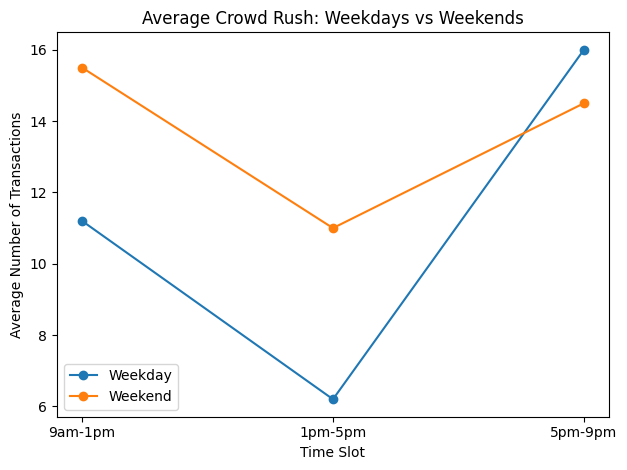

In [ ]:
# Plot the line graph
plt.plot(time_slots, list(transaction_counts_weekday.values()), marker='o', label='Weekday')
plt.plot(time_slots, list(transaction_counts_weekend.values()), marker='o', label='Weekend')

plt.xlabel('Time Slot')
plt.ylabel('Average Number of Transactions')
plt.title('Average Crowd Rush: Weekdays vs Weekends')
plt.legend()
plt.tight_layout()

# Display the graph
plt.show()

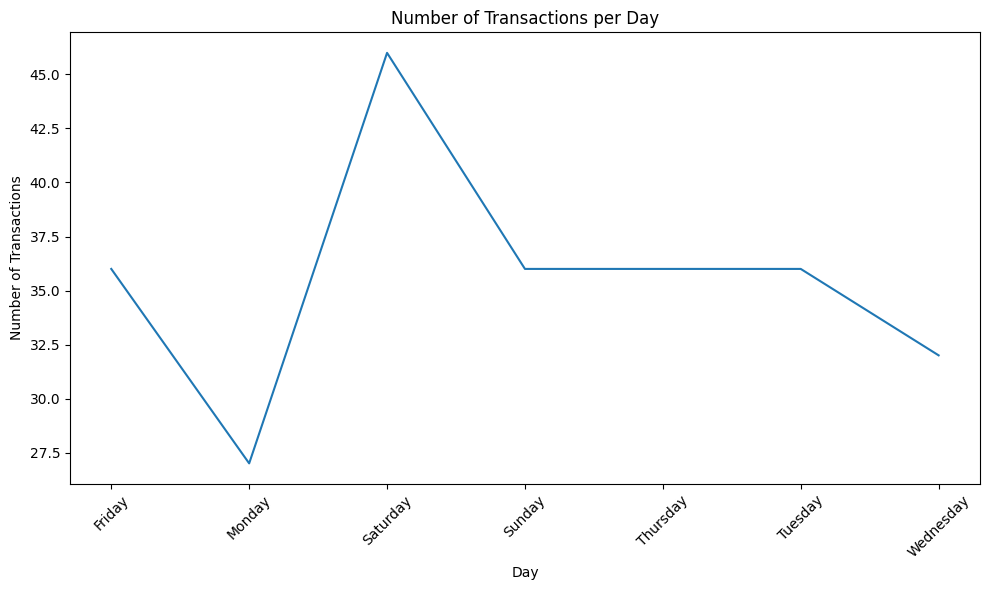

In [ ]:
# Group by 'Day' and count the number of transactions for each day
transaction_counts_by_day = df.groupby('Day')['Time'].count()

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(transaction_counts_by_day.index, transaction_counts_by_day.values)
plt.xlabel('Day')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Day')
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


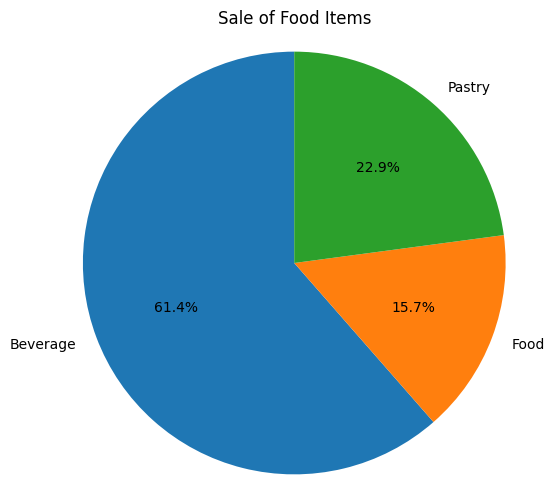

In [ ]:

import matplotlib.pyplot as plt

# Group by 'Item' and count the number of transactions for each item
item_counts = df.groupby('Category')['Time'].count()

# Create the pie chart
plt.figure(figsize=(6, 6))  # Adjust figure size if needed
plt.pie(item_counts, labels=item_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sale of Food Items')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


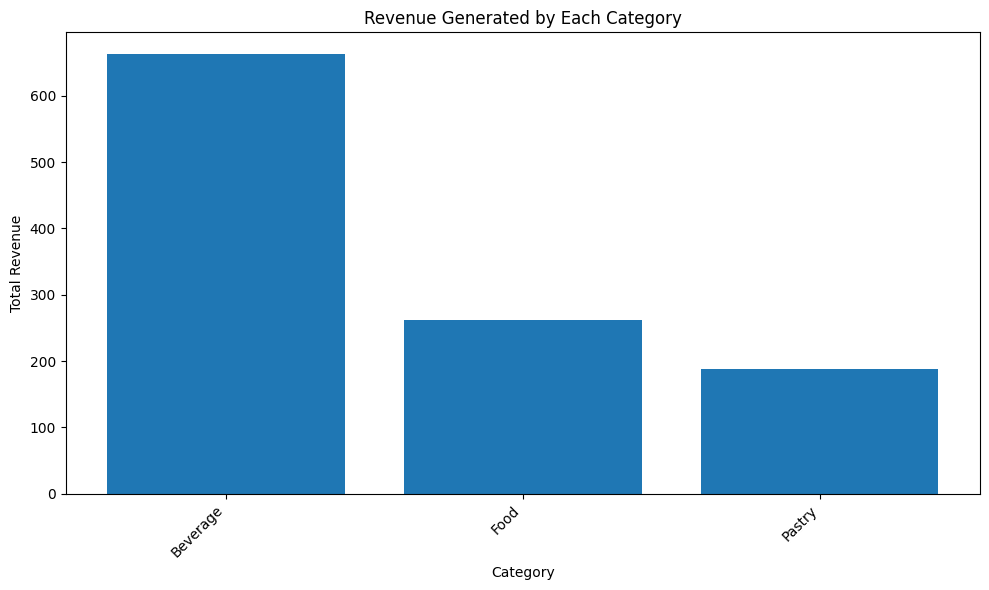

In [ ]:
# prompt: create a graph to show that which Category generated more revenue

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and has 'Category' and 'Price' columns

# Convert 'Price' to numeric, handling potential errors
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Group by 'Category' and sum the 'Price' for each category
revenue_by_category = df.groupby('Category')['Amount'].sum()

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(revenue_by_category.index, revenue_by_category.values)
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.title('Revenue Generated by Each Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if they overlap
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


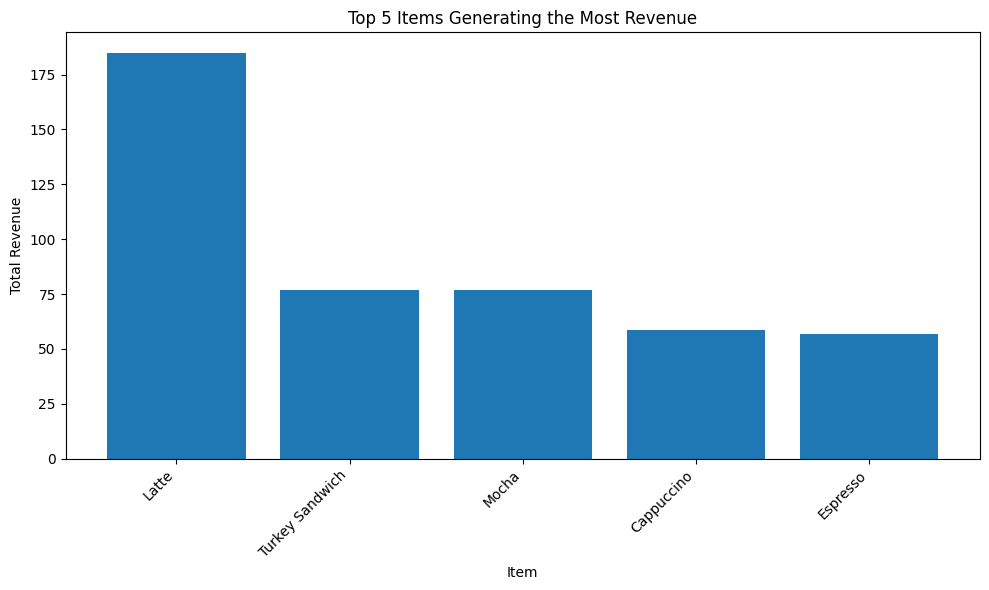

In [ ]:
# prompt: create a graph to show that which top 5 item generated more revenue

import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and has 'Item' and 'Price' columns

# Convert 'Price' to numeric, handling potential errors
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Group by 'Item' and sum the 'Price' for each item
revenue_by_item = df.groupby('Item')['Amount'].sum()

# Sort the revenue by item in descending order and get the top 5 items
top_5_items = revenue_by_item.sort_values(ascending=False).head(5)

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(top_5_items.index, top_5_items.values)
plt.xlabel('Item')
plt.ylabel('Total Revenue')
plt.title('Top 5 Items Generating the Most Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if they overlap
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


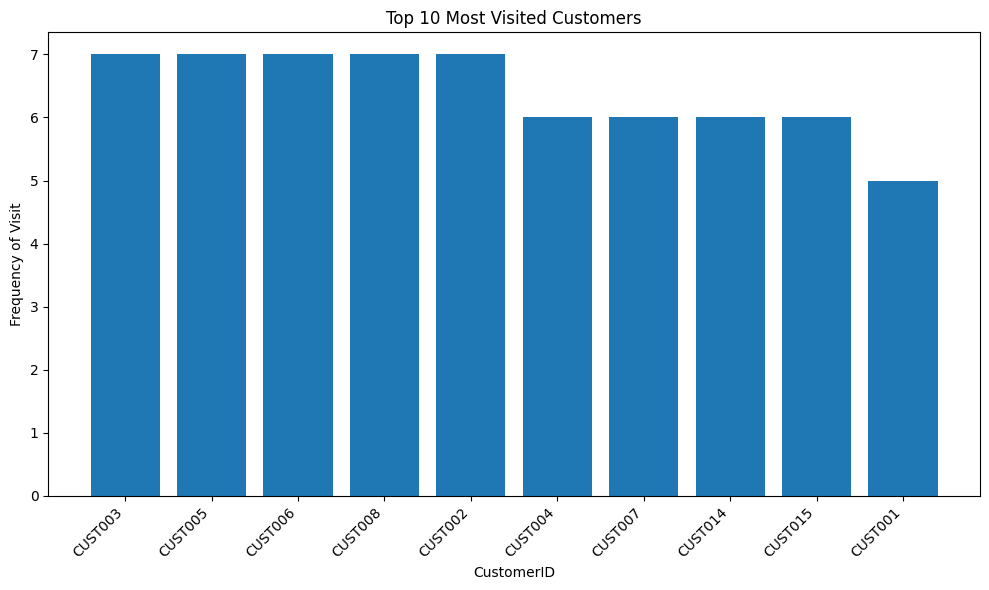

In [8]:
# prompt: plot a graph for customerID vs frequency of visit (for top 10 most visited customer)

customer_visit_counts = df['CustomerID'].value_counts()

# Get the top 10 most visited customers
top_10_customers = customer_visit_counts.head(10)

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_customers.index, top_10_customers.values)
plt.xlabel('CustomerID')
plt.ylabel('Frequency of Visit')
plt.title('Top 10 Most Visited Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()